fonte: https://basedosdados.org/dataset/9a2368e4-2fa6-4b42-88b7-026aa048f5ab?table=82e257d0-3564-4122-ba4a-78a039ca89b7

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
import basedosdados as bd


In [9]:
dados =pd.read_csv('dados_basedosdados.csv')

Downloading: 100%|████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 522.16rows/s]


In [8]:
dados.head(10)

,ano,sigla_uf,id_municipio,grupo,quantidade_homicidio_doloso,quantidade_latrocinio,quantidade_lesao_corporal_morte,quantidade_mortes_policiais_confronto,quantidade_mortes_intervencao_policial,quantidade_mortes_intervencao_policial_civil_em_servico,...,proporcao_mortes_intenvencao_policial_x_mortes_violentas_intencionais,quantidade_posse_ilegal_arma_de_fogo,quantidade_porte_ilegal_arma_de_fogo,quantidade_posse_ilegal_porte_ilegal_arma_de_fogo,quantidade_trafico_entorpecente,quantidade_posse_uso_entorpecente,quantidade_morte_policiais_civis_confronto_em_servico,quantidade_morte_policiais_militares_confronto_em_servico,quantidade_morte_policiais_civis_fora_de_servico,quantidade_morte_policiais_militares_fora_de_servico
0,2016,AL,2704302,Grupo 1,449,21,2,5,59,0,...,11.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,2,1,2
1,2016,CE,2304400,Grupo 1,965,27,15,8,39,1,...,3.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,2,5
2,2016,ES,3205309,Grupo 1,51,0,3,0,9,1,...,14.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,0
3,2016,GO,5208707,Grupo 1,452,33,14,3,100,0,...,16.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,3
4,2016,MA,2111300,Grupo 1,498,23,12,1,27,0,...,4.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,1
5,2016,MT,5103403,Grupo 1,196,18,4,3,<NA>,0,...,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,0,2
6,2016,PA,1501402,Grupo 1,878,41,20,10,39,<NA>,...,3.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,1,2,7
7,2016,PB,2507507,Grupo 1,341,8,1,4,5,1,...,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,2,1,1
8,2016,PE,2611606,Grupo 1,624,5,11,6,15,<NA>,...,2.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,1,5
9,2016,PI,2211001,Grupo 1,341,22,4,1,7,0,...,1.0,<NA>,<NA>,<NA>,<NA>,<NA>,0,0,0,1


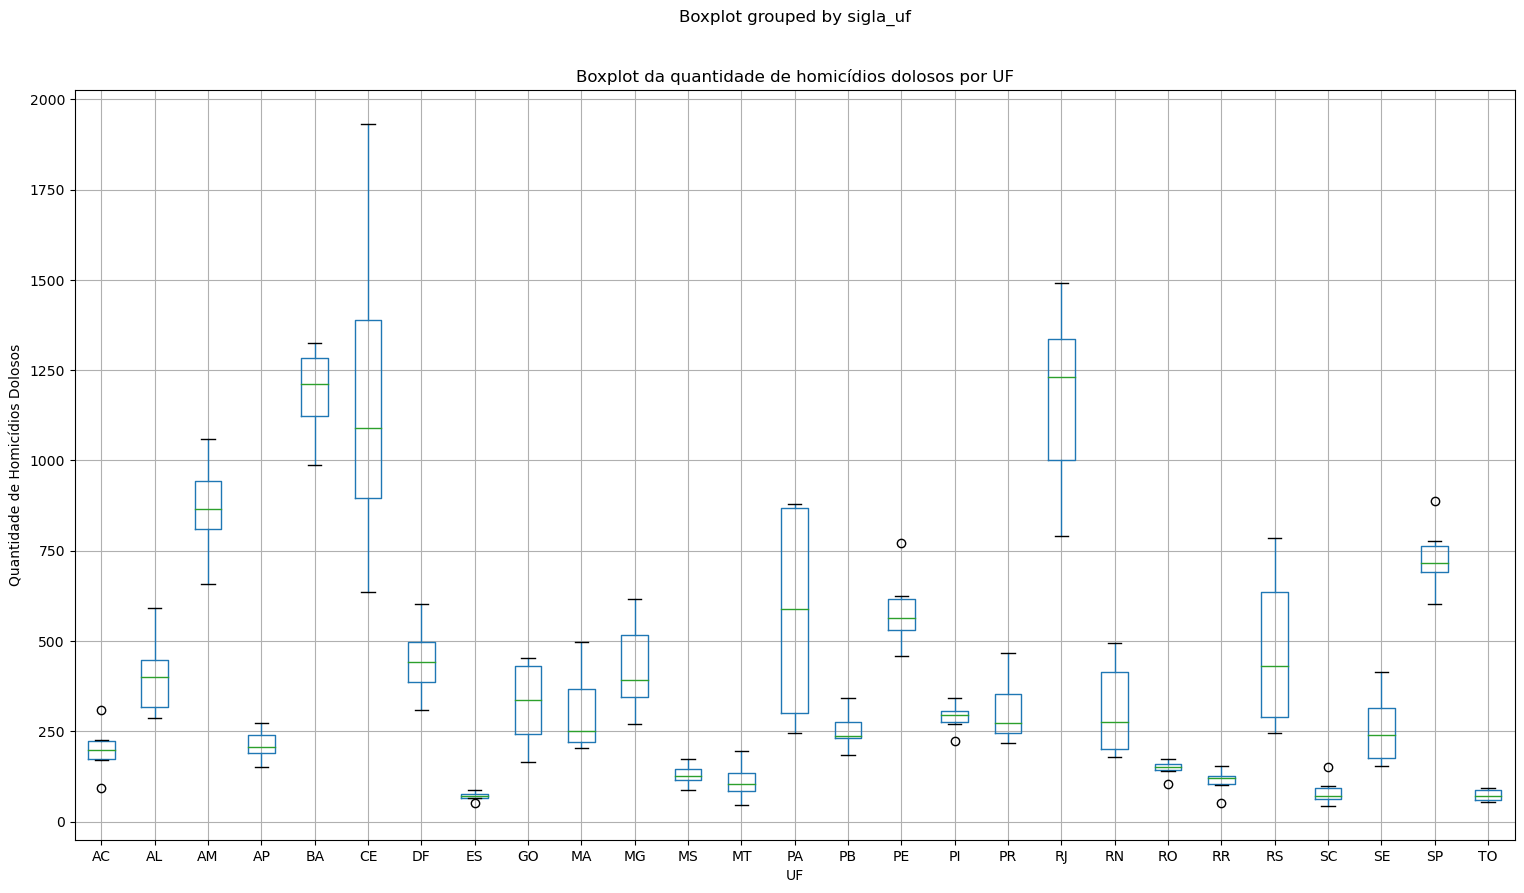

In [29]:
# Plotar o boxplot com tamanho da figura ajustado
fig, ax = plt.subplots(figsize=(18, 10))
dados.boxplot('quantidade_homicidio_doloso', 'sigla_uf', ax=ax)
ax.set_title('Boxplot da quantidade de homicídios dolosos por UF')
ax.set_xlabel('UF')
ax.set_ylabel('Quantidade de Homicídios Dolosos')
plt.show()